In [1]:
#本章需导入的模块
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_classification,make_circles,make_regression
from sklearn.model_selection import train_test_split,KFold
import sklearn.neural_network as net
import sklearn.linear_model as LM
from scipy.stats import multivariate_normal
from sklearn.metrics import r2_score,mean_squared_error,classification_report
from sklearn import svm
import os

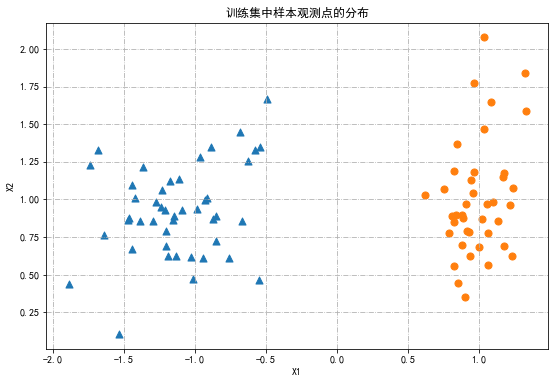

In [2]:
N=100
X,Y=make_classification(n_samples=N,n_features=2,n_redundant=0,n_informative=2,class_sep=1,random_state=1,n_clusters_per_class=1)

plt.figure(figsize=(9,6))
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.85, random_state=123)
markers=['^','o']
for k,m in zip([1,0],markers):
    plt.scatter(X_train[Y_train==k,0],X_train[Y_train==k,1],marker=m,s=50)
plt.title("训练集中样本观测点的分布")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True,linestyle='-.')
plt.show()   

超平面的常数项b： [0.00427528]
超平面系数W： [[-1.75478826  0.07731007]]
支持向量的个数： [1 2]


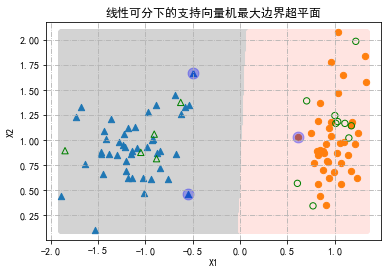

In [3]:
N=100
X,Y=make_classification(n_samples=N,n_features=2,n_redundant=0,n_informative=2,class_sep=1,random_state=1,n_clusters_per_class=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.85, random_state=123)
X1,X2= np.meshgrid(np.linspace(X_train[:,0].min(),X_train[:,0].max(),500),np.linspace(X_train[:,1].min(),X_train[:,1].max(),500))
X0=np.hstack((X1.reshape(len(X1)*len(X2),1),X2.reshape(len(X1)*len(X2),1)))
modelSVC=svm.SVC(kernel='linear',random_state=123,C=2) #modelSVC=svm.LinearSVC(C=2,dual=False)
modelSVC.fit(X_train,Y_train)
print("超平面的常数项b：",modelSVC.intercept_)
print("超平面系数W：",modelSVC.coef_)
print("支持向量的个数：",modelSVC.n_support_)
Y0=modelSVC.predict(X0)
plt.figure(figsize=(6,4)) 
plt.scatter(X0[np.where(Y0==1),0],X0[np.where(Y0==1),1],c='lightgray')
plt.scatter(X0[np.where(Y0==0),0],X0[np.where(Y0==0),1],c='mistyrose')
for k,m in [(1,'^'),(0,'o')]:
    plt.scatter(X_train[Y_train==k,0],X_train[Y_train==k,1],marker=m,s=40)
    plt.scatter(X_test[Y_test==k,0],X_test[Y_test==k,1],marker=m,s=40,c='',edgecolors='g')

plt.scatter(modelSVC.support_vectors_[:,0],modelSVC.support_vectors_[:,1],marker='o',c='b',s=120,alpha=0.3)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("线性可分下的支持向量机最大边界超平面")
plt.grid(True,linestyle='-.')
plt.show()   


代码说明：
（1）第1至5行：生成同8.6.1相同的模拟数据。采用旁置法将数据集划分为训练机和测试集。为绘制分类边界准备数据：为在训练集两个输入变量取值范围内的250000个样本观测点。
（2）第6，7行：建立完全线性可分下的支持向量分类机，并拟合训练数据。
不同场景下的支持向量分类均可通过函数svm.SVC ()实现。其中指定参数kernel='linear'即为线性可分场景。参数C为（式8.13）中的C。
（3）第8至10行：输出最大边界超平面参数以及支持向量的个数。这里分别在两个类别中找到了1和2个支持向量。最大边界超平面参数以及支持向量的个数依次存储在模型对象的.intercept_、.coef_和.n_support_属性中。
（4）第11行：基于最大边界超平面预测250000个样本观测的类别。
（5）第13，14行：绘制两个类别区域。指定灰色为1类区域，粉色为0类区域。两区域的边界即为最大边界超平面。
（6）第15至17行：将样本观测点添加到图中。落入灰色区域的样本观测点将预测为1类，落入粉色区域的将预测为0类。
（7）第19行：在图中标记出支持向量。支持向量的坐标存储在模型对象的.support_vectors_属性中。
